# IMC HDIpreprocessing

In [1]:
# Extract cores from TMA using morphological operations
# import custom modules
from miaaim.proc.hdiproc import HDIpreprocessing

# import other modules
import pandas as pd
from pathlib import Path
# check versions and environment executable
import sys
sys.version
sys.executable

2022-12-25 15:03:31.500649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'/opt/conda/envs/miaaim-dev/bin/python'

------
### Set paths to data and get marker information
------

In [2]:
# set path to data folder
data_folder = Path("/opt/miaaim-20220912-TMA4/data")
# set the path to the imaging data
path_to_modality = data_folder.joinpath("ROI022_PROSTATE_TMA013/input/imc")

In [3]:
# get image preprocessing channels to use as a list of indices
prep_channels = pd.read_csv(Path(data_folder).joinpath("imc-preprocessing-markers.csv"))
prep_channels = [int(prep_channels.Page.values[i]) for i in range(len(prep_channels.Page.values))]

------
### Preprocessing and quality control
------

In [4]:
# create preprocessing object
imc = HDIpreprocessing(
    paths=path_to_modality,
    path_to_markers=None,
    flatten=False,
    subsample=None,
    mask=True,
    save_mem=False
    )

MIAAIM PREPROCESSING
MIAAIM VERSION 0.0.2
METHOD: HDIpreprocessing
ROOT FOLDER: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013
RESULTS FOLDER: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc
PROVENANCE FOLDER: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/docs/provenance
QC FOLDER: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/docs/qc/preprocessing/imc 

IMPORTING DATA
mask: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/input/imc/ROI022_PROSTATE_TMA013_mask.tiff
Valid path...
Valid file extension...
file name: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/input/imc/ROI022_PROSTATE_TMA013.ome.tiff
Finished parsing data


PROCESSING DATA


In [5]:
# apply manual mask
imc.ApplyManualMask()

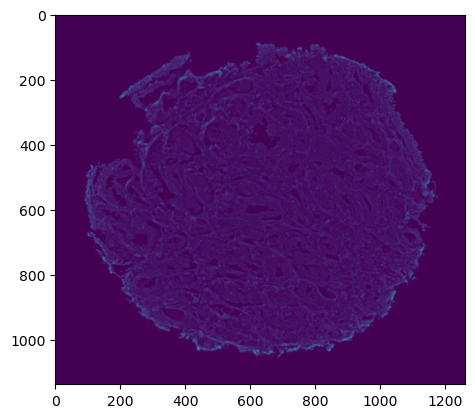

In [6]:
# check ruthenium stain
imc.PlotInputImage(channel=8)

In [7]:
# process data
imc.Slice(channels=8)
imc.MedianFilter(filter_size=10,parallel=False)
imc.Threshold(type='otsu')

/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/proc/_morph.py:42: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  filtered_im = skimage.filters.median(



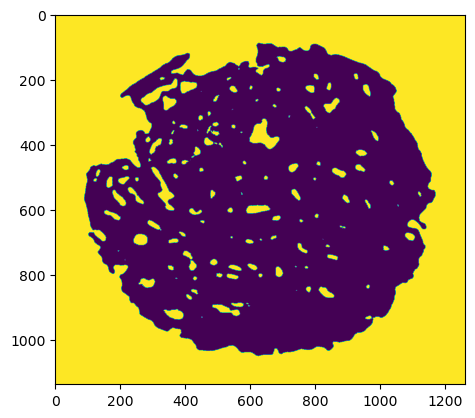

In [8]:
# check processed mask
imc.PlotProcessedImage()

Fill: filling holes of processed mask


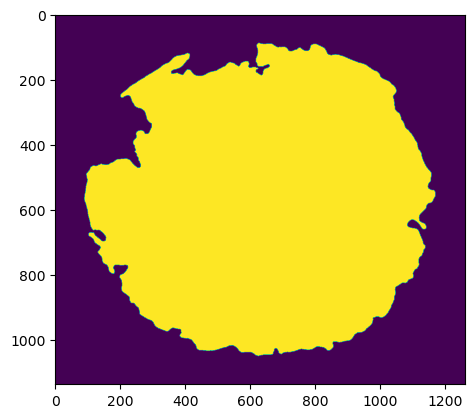

In [9]:
# invert mask
imc.InvertMask()
imc.Fill()
# check processed mask
imc.PlotProcessedImage()

NonzeroBox: applying nonzero box to processed image
ApplyMask: applying processed mask to image


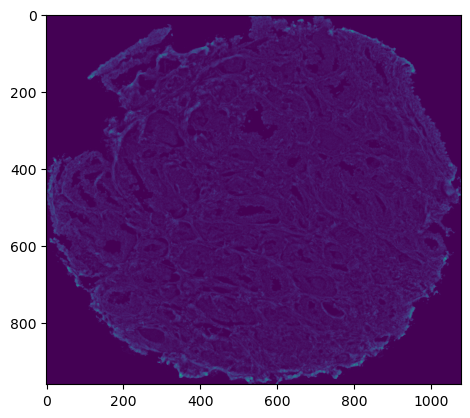

In [10]:
# apply opening
imc.NonzeroBox()
# apply the final mask after all operations (invert boolean mask)
imc.ApplyMask(invert=False)
# check raw image after applying the mask
imc.PlotInputImage(channel=8)

In [11]:
# export raw ome tiff processed image
imc.Export(
    suffix="_core.ome.tiff",
    padding=(100,100),
    target_size=None
    )

Export: exporting processed image
Exporting f/opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core.ome.tiff...
/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/io/imwrite/_export.py:62: UserWarning: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core.ome.tiff is a low contrast image
  skimage.io.imsave(self.path, arr.transpose(2,0,1), plugin="tifffile")

Finished exporting /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core.ome.tiff


RunOptimalUMAP: computing optimal UMAP embedding
Reloading using processed mask for dimension reduction
implementing default subsampling...
Created hdi data
DeepSlice: slicing all data for images
Computing UMAP simplicial set on 49 image channels...
Computing 3000 spectral landmarks...
/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(

Embedding in dimension 1
Finished embedding
/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/proc/_fuzzy_ops.py:104: RuntimeWarning: divide by zero encountered in log
  Psi_summands[w0] = np.log(1 - Psi[w0])

/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/proc/_fuzzy_ops.py:106: RuntimeWarning: divide by zero encountered in log
  (1 - weights[other]), np.log(1 - Psi[other])

Embedding in dimension 2
Finished embedding
/opt/conda/e

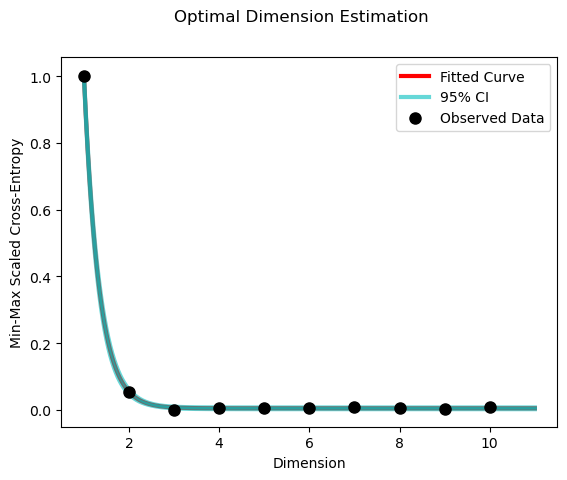

In [12]:
# run dimension reduction for registration preprocessing
imc.RunOptimalUMAP(n_jobs=-1,channels=prep_channels,random_state=0)
# map pixels to spatial coordinates
imc.SpatiallyMapUMAP(method='coordinate')

In [13]:
# export core image
imc.Export(
    suffix="_core_UMAP.nii",
    padding=(100,100),
    target_size=None
    )
# export mask
imc.ExportMask(
    suffix="_core_mask.tif",
    padding=(100,100),
    target_size=None
    )

Export: exporting processed image
Exporting f/opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core_UMAP.nii...
Finished exporting /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core_UMAP.nii
ExportMask: exporting processed mask
Exporting f/opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core_mask.tif...
/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/io/imwrite/_export.py:66: UserWarning: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(self.path, arr, plugin="tifffile")

Finished exporting /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/preprocessing/imc/ROI022_PROSTATE_TMA013_core_mask.tif


In [14]:
# export documentation and QC images
imc.QC()

QC: extracting quality control information
Extracting countour from processed masks
Exporting f/opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/docs/qc/preprocessing/imc/ROI022_PROSTATE_TMA013_qcMask.tiff...
/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/io/imwrite/_export.py:66: UserWarning: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/docs/qc/preprocessing/imc/ROI022_PROSTATE_TMA013_qcMask.tiff is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(self.path, arr, plugin="tifffile")

/opt/conda/envs/miaaim-dev/lib/python3.10/site-packages/miaaim/io/imwrite/_export.py:66: UserWarning: /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/docs/qc/preprocessing/imc/ROI022_PROSTATE_TMA013_qcMask.tiff is a low contrast image
  skimage.io.imsave(self.path, arr, plugin="tifffile")

Finished exporting /opt/miaaim-20220912-TMA4/data/ROI022_PROSTATE_TMA013/docs/qc/preprocess